<a href="https://colab.research.google.com/github/jinsooya/emba/blob/main/07_langchain-document-loaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

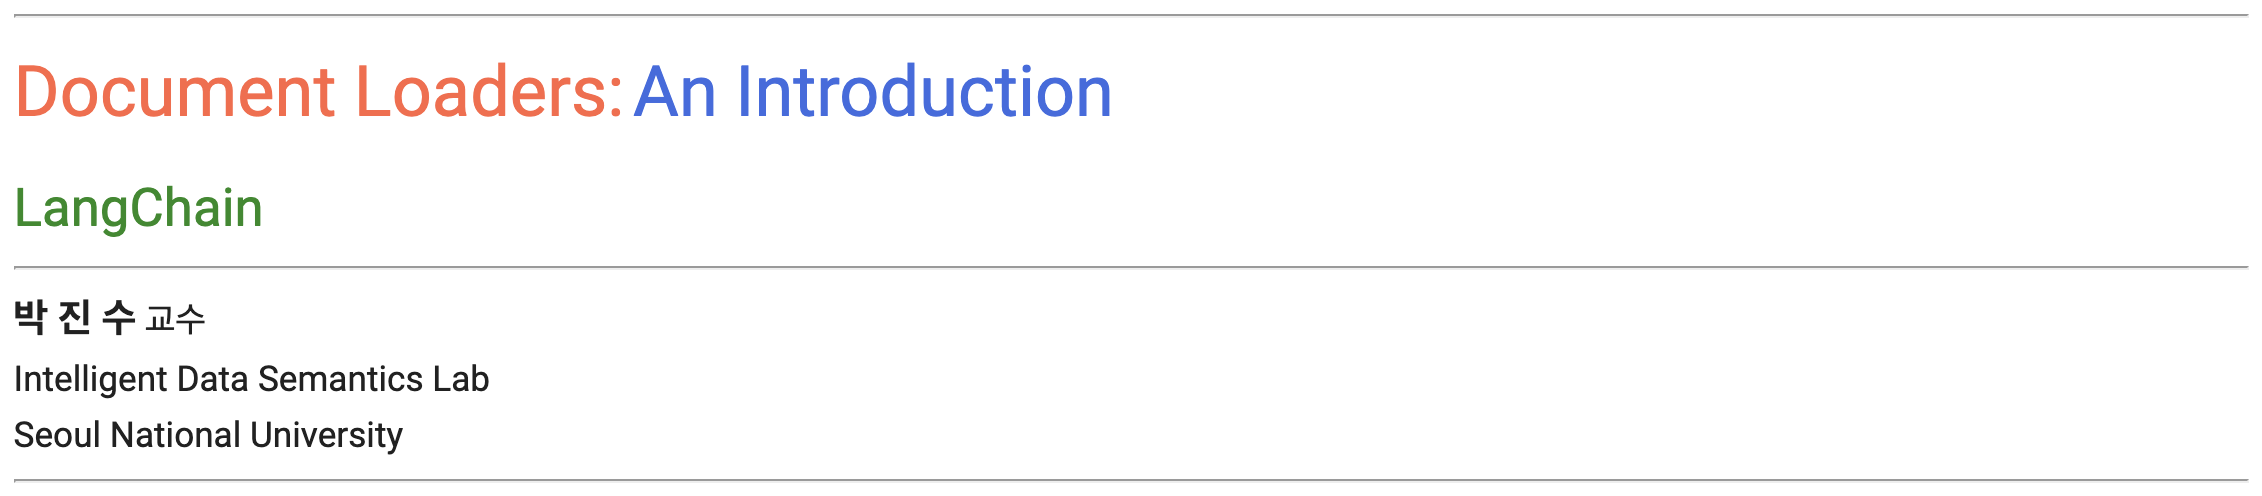

- - -    

- 본 자료는 강의를 위한 목적으로 제작되었습니다.
- 본 자료에 대한 사전 허가를 받지 않는 배포를 금지합니다.
- 본 자료를 강의나 다른 목적으로 활용하고자 하시는 경우 꼭 아래 이메일 주소로 연락주세요.
- 연락처 : [jinsoo@snu.ac.kr](jinsoo@snu.ac.kr)

- - -

**<font size='+2'>목차**

>[텍스트 파일](#scrollTo=1p4gwVlgbZ35)

>[PDF 파일](#scrollTo=bxE_NldyaKWB)

>>[PyPDFLoader](#scrollTo=8JHe2B4Rb9-N)

>>[PyPDFDirectoryLoader](#scrollTo=4ALK6Zaucfn-)

>>[PyMuPDFLoader](#scrollTo=Yxf7zE8tcDBq)

>[유튜브](#scrollTo=jdIRu5aXbgsa)

>[웹 페이지](#scrollTo=T7H81cMyb2O2)

>>[WebBaseLoader](#scrollTo=bTqrbGNdcold)

>>[RecursiveUrlLoader](#scrollTo=zcC2W73BcrwV)

>>>[No extractor](#scrollTo=4GhajC2Og8Da)

>>>[extractor 사용](#scrollTo=irLwjZ1ThLRL)



**<font size='+1'>관련 모듈 설치</font>**

In [ ]:
# 패키지 설치하는데 30초 이상 걸릴 수 있다.
!python -m pip install --quiet tiktoken langchain langchain-community pypd pymupdf unstructured yt_dlp openai pydub
print('Job done!')

**<font size='+1'>관련 파일 가져오기</font>**

In [ ]:
!gdown 1XI6zTbBNvXwEIdX7nNFwwvJuQjpFiEpv -O frankenstein.txt
!gdown 1fDGjEmV-gLdE9hp-SyFegLTqZ0gJhb-5 -O apple-10k-2024.pdf
!gdown 1rcnxJd3aNjeFez8GgEbiLuVfXTCSkyaA -O google-10k-2024.pdf
!gdown 171_5-KiXxpmki9E_Pdjkllz4avdTDq0C -O uber-10k-2024.pdf
!gdown 1-_yUKervbHHy-pHL7o-ntbr3ZQ5BS23y -O lyft-10k-2024.pdf

# 텍스트 파일

In [ ]:
# --- load method
from langchain_community.document_loaders import TextLoader

# 텍스트 파일을 하나의 파일로 로드한다.
loader = TextLoader('frankenstein.txt')
doc = loader.load()  # -> List[Document]
print(len(doc))

In [ ]:
print(doc)

In [ ]:
print(doc[0])

In [ ]:
# --- load_and_split method
from langchain_community.document_loaders import TextLoader

# 텍스트 파일을 하나의 파일로 로드한다.
loader = TextLoader('frankenstein.txt')
splits = loader.load_and_split()  # -> List[Document]
print(len(splits))

In [ ]:
print(splits[0])

In [ ]:
print(splits[-1])

In [ ]:
# --- RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 텍스트 파일을 하나의 파일로 로드한다.
loader = TextLoader('frankenstein.txt')

# RecursiveCharacterTextSplitter 객체를 생성한다.
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=300
)

splits = loader.load_and_split(splitter)  # -> List[Document]
print(len(splits))

In [ ]:
print(splits[0])

In [ ]:
print(splits[-1])

# PDF 파일

## PyPDFLoader

In [ ]:
# --- load method
from langchain_community.document_loaders import PyPDFLoader

# PDF 파일을 페이지 단위로 로드한다.
loader = PyPDFLoader('apple-10k-2024.pdf')
pages = loader.load()  # -> List[Document]
print(len(pages))  # 페이지 단위로 분할한다.

In [ ]:
print(pages[0])

In [ ]:
print(pages[0].page_content)

In [ ]:
# --- load_and_split method
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader('apple-10k-2024.pdf')
splits = loader.load_and_split()  # -> List[Document]
print(len(splits))

In [ ]:
# --- RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

loader = PyPDFLoader('apple-10k-2024.pdf')

# RecursiveCharacterTextSplitter 객체를 생성한다.
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=300
)

splits = loader.load_and_split(splitter)  # -> List[Document]
print(len(splits))

In [ ]:
# --- combining all pages
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader('apple-10k-2024.pdf')
pages = loader.load()  # -> List[Document]
all_pages = [p.page_content for p in pages]  # 각 페이지에서 텍스트만 가져와 리스트에 추가한다.

# 모든 페이지를 하나의 텍스트로 합친다.
text = ' '.join(all_pages)
print(text[:1000], text[-1000:], sep='\n\n%%%%%%%%%%%%%%%\n\n')

## PyPDFDirectoryLoader

In [ ]:
from langchain_community.document_loaders import PyPDFDirectoryLoader

loader = PyPDFDirectoryLoader('.')
pages = loader.load()
len(pages)

## PyMuPDFLoader

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

# PDF 파일을 페이지 단위로 로드한다.
# 특히 PDF 문서의 자세한 메타데이터를 추출하는 데 강점이 있다.
loader = PyMuPDFLoader('apple-10k-2024.pdf')
pages = loader.load()
len(pages)

In [ ]:
pages[0].metadata

# 유튜브

- - -
YouTube 동영상에서 텍스트 인식할 때 OpenAI API가 필요하다.
- - -

In [ ]:
!mkdir -p youtube

In [ ]:
from google.colab import userdata
from langchain_community.document_loaders.generic import GenericLoader
from langchain_community.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader
from langchain_community.document_loaders.parsers.audio import OpenAIWhisperParser

URL = 'https://www.youtube.com/watch?v=0f9chDau3Fk'
loader = GenericLoader(
    YoutubeAudioLoader(urls=[URL], save_dir='youtube'),
    # --- 방법 1
    OpenAIWhisperParser(api_key=userdata.get('OPENAI_API_KEY'))
    # --- 방법 2 (caution) API 키 노출 주의
    # OpenAIWhisperParser(api_key='YOUR_OPENAI_API_KEY')
)
doc = loader.load()
print(len(doc))

In [ ]:
doc[0].metadata

In [ ]:
doc[0].page_content[:200]

# 웹 페이지

## WebBaseLoader

In [ ]:
import os
os.environ['USER_AGENT'] = 'myagent'

In [ ]:
from bs4 import SoupStrainer
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader(
    web_paths=['https://ko.wikipedia.org/wiki/세종'],
    bs_kwargs={'parse_only': SoupStrainer('p')}
)
doc = loader.load()
print(len(doc))

In [ ]:
doc[0].metadata

In [ ]:
import textwrap
print(textwrap.fill(doc[0].page_content, width=75))

## RecursiveUrlLoader

### No extractor

In [ ]:
# WARNING: It will take time.
from langchain_community.document_loaders import RecursiveUrlLoader

URL = 'https://cba.snu.ac.kr'
loader = RecursiveUrlLoader(URL)
docs = loader.load()
print(len(docs))

In [ ]:
for doc in docs:
    print(doc.metadata)

In [ ]:
print(docs[0].page_content)

### extractor 사용

In [ ]:
# WARNING: It will take time.
from bs4 import BeautifulSoup
from langchain_community.document_loaders import RecursiveUrlLoader

URL = 'https://cba.snu.ac.kr'
loader = RecursiveUrlLoader(
    url=URL,
    extractor=lambda o: BeautifulSoup(o, 'html.parser').text
)
docs = loader.load()
print(len(docs))

In [ ]:
for doc in docs:
    print(doc.metadata)

In [ ]:
print(docs[0].page_content)

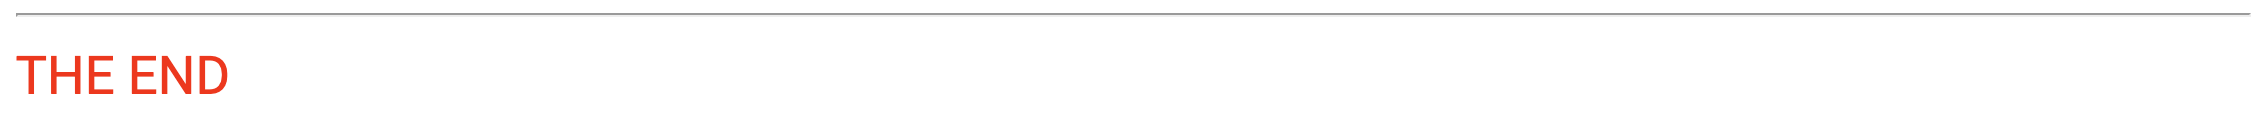